#  Apply Principal Component Analysis (PCA) on Pizza Dataset.


###### Who likes pizza? The data set contains measurements that capture the kind of things that make a pizza tasty. The variables in the data set are:brand -- Pizza brand (class label)
###### id -- Sample analysed
###### mois -- Amount of water per 100 grams in the sample
###### prot -- Amount of protein per 100 grams in the sample
###### fat -- Amount of fat per 100 grams in the sample
###### ash -- Amount of ash per 100 grams in the sample
###### sodium -- Amount of sodium per 100 grams in the sample
###### carb -- Amount of carbohydrates per 100 grams in the sample
###### cal -- Amount of calories per 100 grams in the sample

## Import Libraries

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
%matplotlib inline

# Reading the Data
Storing csv file in a data variable 

In [11]:
df=pd.read_csv('pizza.csv')
df

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


# Inspect the dataframe

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


# Checking Object values

In [16]:
df.brand.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

# Brand count

In [17]:
df['brand'].value_counts()

H    33
D    32
J    32
B    31
F    30
I    29
G    29
A    29
E    28
C    27
Name: brand, dtype: int64

# Bar-Graph based on Brand

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='brand', ylabel='count'>

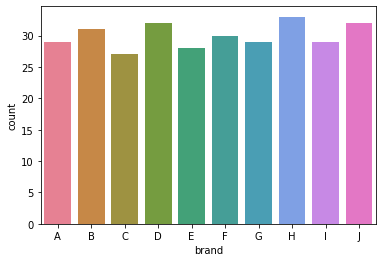

In [18]:
sns.countplot(df['brand'], palette='husl')

# The pairwise correlation of all columns in the dataframe

In [25]:
r=df.corr()
r

,id,mois,prot,fat,ash,sodium,carb,cal
id,1.000000,0.032595,-0.076485,-0.004860,-0.034072,-0.015156,0.014966,-0.021209
mois,0.032595,1.000000,0.360248,-0.171318,0.265556,-0.102279,-0.591802,-0.764441
prot,-0.076485,0.360248,1.000000,0.498002,0.823844,0.429130,-0.853542,0.070258
fat,-0.004860,-0.171318,0.498002,1.000000,0.791634,0.933325,-0.640238,0.764567
ash,-0.034072,0.265556,0.823844,0.791634,1.000000,0.808122,-0.898988,0.326468
sodium,-0.015156,-0.102279,0.429130,0.933325,0.808122,1.000000,-0.620176,0.671958
carb,0.014966,-0.591802,-0.853542,-0.640238,-0.898988,-0.620176,1.000000,-0.023485
cal,-0.021209,-0.764441,0.070258,0.764567,0.326468,0.671958,-0.023485,1.000000


# Moisture data less than equal to 27

In [27]:
df.loc[(df['mois']<=27)]

,brand,id,mois,prot,fat,ash,sodium,carb,cal
11,A,14108,26.98,21.20,45.03,5.15,1.67,1.64,4.97
191,G,14066,26.33,8.03,19.98,1.43,0.45,44.23,3.89
200,G,24156,26.19,7.99,17.53,1.42,0.44,46.87,3.77
201,G,34008,26.45,7.89,17.97,1.30,0.39,46.39,3.79
203,G,24059,25.00,8.49,16.87,1.45,0.47,48.19,3.79


# Protein data greater than equal to 25

In [31]:
df.loc[(df['prot']>=25)]

,brand,id,mois,prot,fat,ash,sodium,carb,cal
60,C,14058,48.40,26.05,21.40,3.44,0.50,0.71,3.00
61,C,14022,48.69,28.48,17.37,3.53,0.43,1.93,2.78
62,C,14036,48.88,25.23,20.89,3.22,0.47,1.78,2.96
63,C,14093,48.97,25.63,19.28,3.48,0.55,2.64,2.87
65,C,14029,49.73,25.65,19.98,2.51,0.52,2.13,2.91
66,C,14106,50.18,28.30,15.79,3.47,0.45,2.26,2.64
67,C,14014,48.15,27.98,18.69,3.58,0.48,1.70,2.87
68,C,14073,49.72,27.31,16.89,3.08,0.25,3.00,2.73
69,C,14151,51.59,26.24,16.41,3.61,0.60,2.15,2.61
70,C,14162,52.26,26.31,14.77,3.51,0.53,3.15,2.51


# Map string value into Int value

In [33]:
df['brand']=df['brand'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10})
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,1,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,1,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,1,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,1,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,1,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [54]:
X=df.drop(['brand'],axis=1)
y= df['brand']

In [55]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

# Covariance Matrix

In [57]:
print("Numpy covariance matrix: \n%s" %np.cov(X_std.T))

Numpy covariance matrix: 
[[ 1.00334448  0.03270407 -0.07674126 -0.00487631 -0.03418551 -0.01520677
   0.0150162  -0.02127955]
 [ 0.03270407  1.00334448  0.36145252 -0.17189118  0.26644367 -0.10262097
  -0.59378092 -0.7669972 ]
 [-0.07674126  0.36145252  1.00334448  0.49966723  0.82659903  0.43056473
  -0.85639691  0.07049308]
 [-0.00487631 -0.17189118  0.49966723  1.00334448  0.79428157  0.93644671
  -0.64237943  0.76712418]
 [-0.03418551  0.26644367  0.82659903  0.79428157  1.00334448  0.8108249
  -0.90199502  0.32756032]
 [-0.01520677 -0.10262097  0.43056473  0.93644671  0.8108249   1.00334448
  -0.6222505   0.67420485]
 [ 0.0150162  -0.59378092 -0.85639691 -0.64237943 -0.90199502 -0.6222505
   1.00334448 -0.02356313]
 [-0.02127955 -0.7669972   0.07049308  0.76712418  0.32756032  0.67420485
  -0.02356313  1.00334448]]


# Explained variance

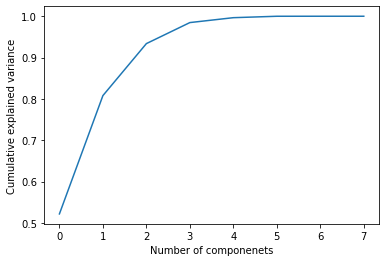

In [59]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of componenets')
plt.ylabel('Cumulative explained variance')
plt.show()

In [67]:
pca = PCA(n_components=5)
x_pca = pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)

[0.52163044 0.28631263 0.12583943 0.05088936 0.01184847]


In [70]:
pca = PCA(n_components=6)
x_pca = pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)

[0.52163044 0.28631263 0.12583943 0.05088936 0.01184847 0.00343629]


In [71]:
x_pca.shape

(300, 6)

In [72]:
pca.components_

array([[-1.99403012e-02,  6.44785509e-02,  3.78951071e-01,
         4.46467403e-01,  4.71813825e-01,  4.35550982e-01,
        -4.24755778e-01,  2.44494235e-01],
       [-5.81763147e-03, -6.28375256e-01, -2.69609639e-01,
         2.34215299e-01, -1.11065055e-01,  2.01521828e-01,
         3.20416546e-01,  5.67407501e-01],
       [ 9.93250052e-01,  4.89635165e-02, -8.22473744e-02,
         4.52319845e-02,  3.45464203e-04,  4.33743722e-02,
        -1.89923636e-02,  2.04451116e-03],
       [ 1.11331687e-01, -4.17773426e-01,  7.40512315e-01,
        -1.93036121e-01,  5.57179039e-02, -4.56740689e-01,
         4.90903283e-02,  1.15424367e-01],
       [ 2.07984566e-02, -2.22559480e-01, -8.86180970e-03,
        -5.06869519e-01,  5.55431191e-01,  4.41865186e-01,
         3.34420063e-01, -2.78305646e-01],
       [ 1.39813075e-02,  4.55739129e-03,  3.89773631e-01,
        -1.75580059e-01, -6.68467507e-01,  6.03270611e-01,
        -6.06485193e-03, -7.88092216e-02]])

In [79]:
x_pca

array([[ 5.0290028 ,  2.68386611, -0.85499716, -0.13904872,  0.12427145,
         0.27201563],
       [ 5.04244094,  2.53395472, -0.85476593, -0.19783697,  0.33404799,
         0.20390771],
       [ 4.82420967,  2.6783973 , -0.85192936, -0.17314067, -0.12660662,
        -0.04818779],
       ...,
       [-0.68430956, -0.52640653,  1.90565247, -0.15994761,  0.28669747,
         0.07000347],
       [-0.84564583, -0.91601339, -0.94092664, -0.60230735,  0.10465491,
        -0.03893425],
       [-0.87643463, -0.76210708, -0.9361534 , -0.63831071,  0.09133658,
        -0.04114087]])

# Scatter plots 

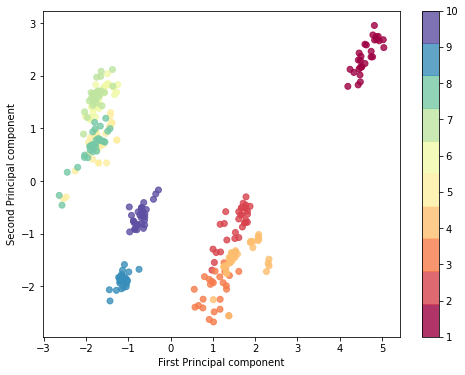

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['brand'], alpha =0.8,cmap = plt.cm.get_cmap('Spectral',10))

plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')

plt.colorbar();

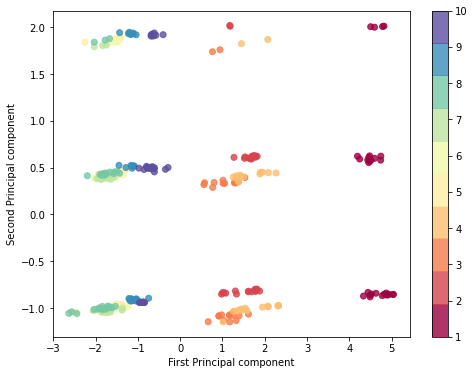

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,2],c=df['brand'], alpha =0.8,cmap = plt.cm.get_cmap('Spectral',10))

plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')

plt.colorbar();

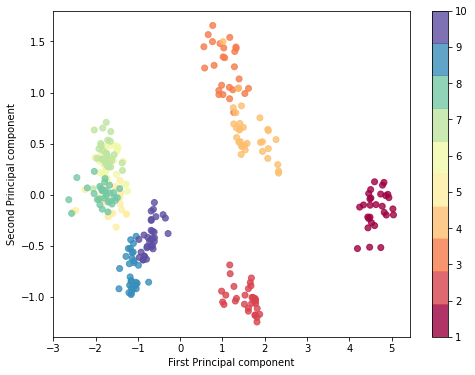

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,3],c=df['brand'], alpha =0.8,cmap = plt.cm.get_cmap('Spectral',10))

plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')

plt.colorbar();

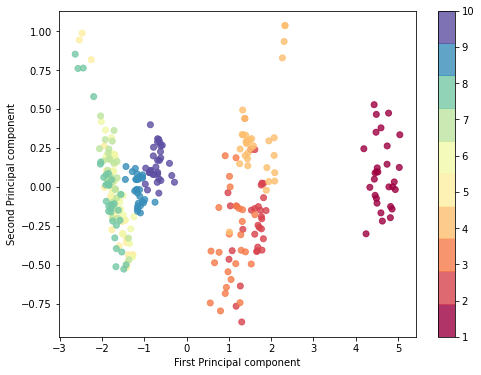

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,4],c=df['brand'], alpha =0.8,cmap = plt.cm.get_cmap('Spectral',10))

plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')

plt.colorbar();

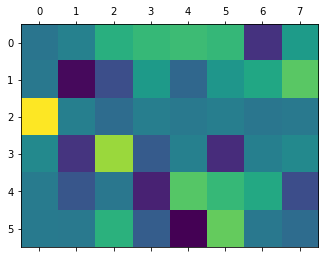

In [80]:
plt.matshow(pca.components_)